# Validation: CM Prior sensitivity

This notebook:

* loads a library defined model. 
* loads the data according to the data preprocessor class.
* Tests the effect of different CM priors on the CM effectiveness

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
### Initial imports
import logging
import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as T
import matplotlib.pyplot as plt
import arviz as az
import seaborn as sns
import scipy
import copy

logging.basicConfig(level=logging.INFO)
log = logging.getLogger(__name__)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from epimodel.pymc3_models.utils import geom_convolution
from epimodel.pymc3_models import cm_effect
from epimodel.pymc3_models.cm_effect.datapreprocessor import DataPreprocessor
import sensitivityplotlib as spl

sns.set_style("ticks")
%matplotlib inline

INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Smoothing
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Albania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Andorra
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Estonia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Iceland
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Latvia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Lithuania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing New Zealand
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Singapore
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Slovakia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Masking


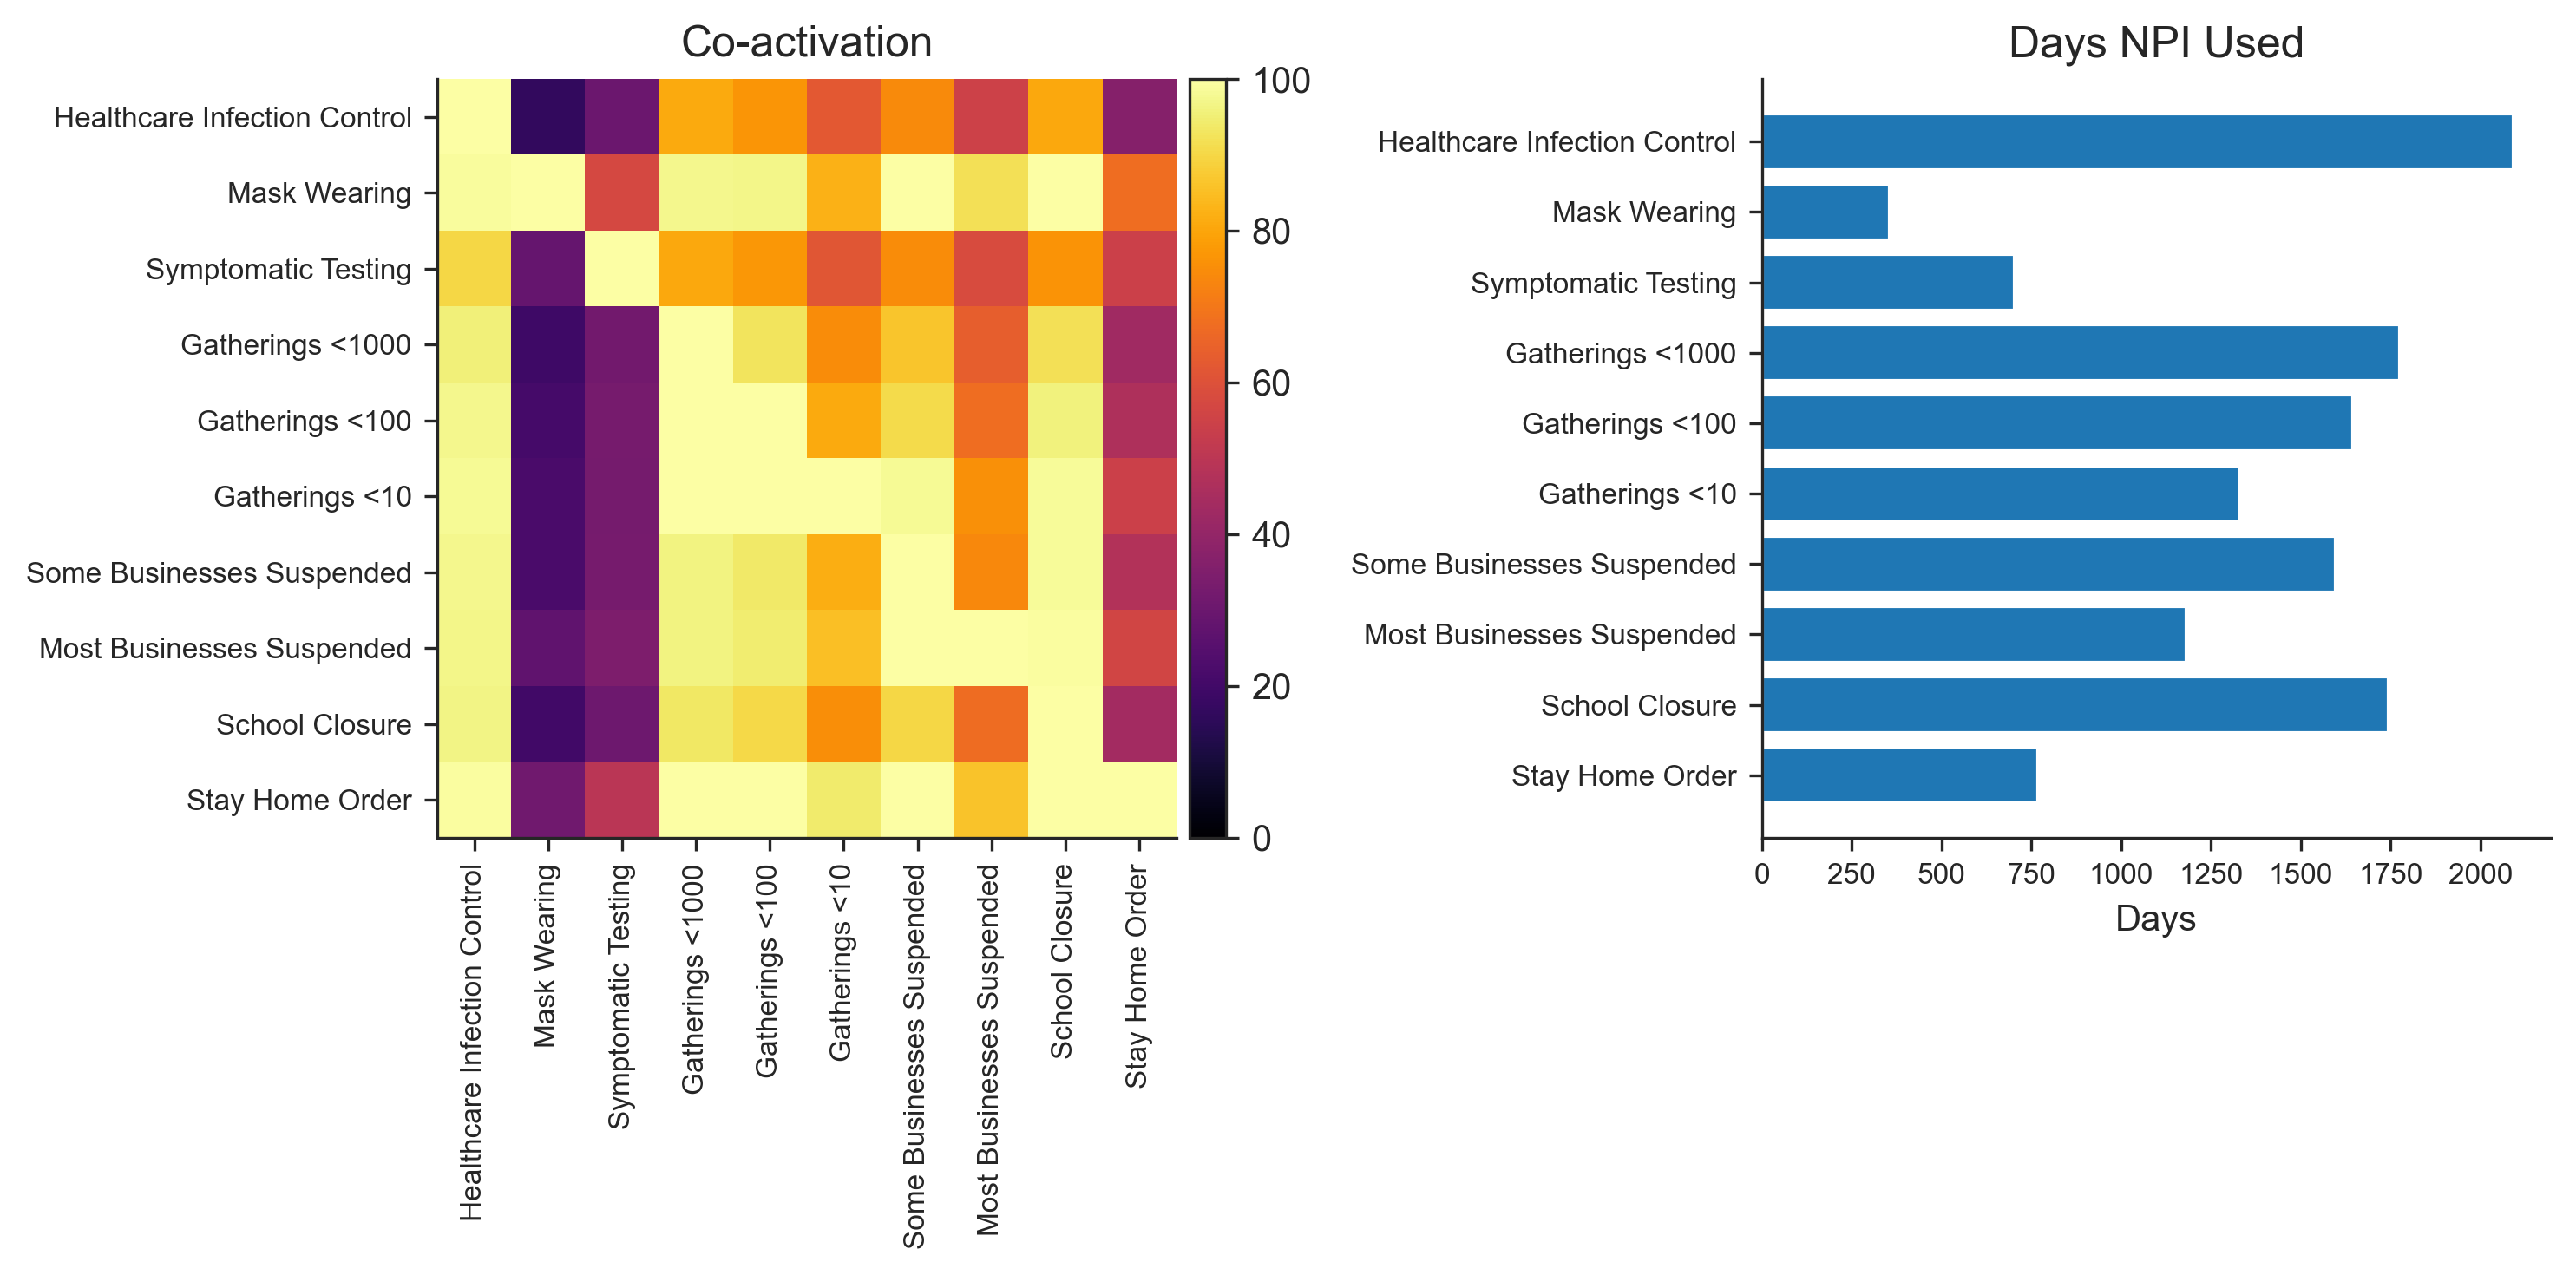

In [3]:
dp = DataPreprocessor()
data = dp.preprocess_data("../final_data/data_final.csv")

In [4]:
priors = ['wide'] 

##### combined model

In [5]:
for prior in priors:
    print(prior)
    with cm_effect.models.CMCombined_Final(data) as model:
        if prior=='default':
            model.build_model()
        if prior=='wide':
            model.build_model(cm_prior_sigma=10)
    model.run(2000)
    filename = 'out/cm_prior_combined_' + str(prior) + '.txt'
    cm_trace = model.trace["CMReduction"]
    np.savetxt(filename, cm_trace)

wide


Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
INFO:pymc3:Initializing NUTS using adapt_diag...


CM_Alpha                    -32.22
HyperRMean                   -0.94
HyperRVar_log__              -0.77
RegionLogR_offset            11.69
GrowthCases                3810.02
GrowthDeaths               3810.02
InitialSizeCases_log       -160.50
InitialSizeDeaths_log      -160.50
ObservedCases           -323829.63
ObservedDeaths          -104785.19
Name: Log-probability of test_point, dtype: float64


Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [InitialSizeDeaths_log, InitialSizeCases_log, GrowthDeaths, GrowthCases, RegionLogR_offset, HyperRVar, HyperRMean, CM_Alpha]
INFO:pymc3:NUTS: [InitialSizeDeaths_log, InitialSizeCases_log, GrowthDeaths, GrowthCases, RegionLogR_offset, HyperRVar, HyperRMean, CM_Alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [1:12:26<00:00,  1.15draws/s]
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


##### deaths model

In [6]:
for prior in priors:
    print(prior)
    with cm_effect.models.CMDeath_Final(data) as model:
        if prior=='default':
            model.build_model()
        if prior=='wide':
            model.build_model(cm_prior_sigma=10)
    model.run(2000)
    filename = 'out/cm_prior_death_' + str(prior) + '.txt'
    cm_trace = model.trace["CMReduction"]
    np.savetxt(filename, cm_trace)

wide


Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
INFO:pymc3:Initializing NUTS using adapt_diag...


CM_Alpha             -32.22
HyperRMean            -0.94
HyperRVar_log__       -0.77
RegionLogR            11.69
ExpectedLogR        1110.21
InitialSize_log     -226.49
Phi_log__             -0.77
ObservedCases     -31245.74
Name: Log-probability of test_point, dtype: float64


Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Phi, InitialSize_log, ExpectedLogR, RegionLogR, HyperRVar, HyperRMean, CM_Alpha]
INFO:pymc3:NUTS: [Phi, InitialSize_log, ExpectedLogR, RegionLogR, HyperRVar, HyperRMean, CM_Alpha]
Sampling 2 chains, 2 divergences: 100%|██████████| 5000/5000 [23:22<00:00,  3.56draws/s]
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


##### Active model

In [7]:
for prior in priors:
    print(prior)
    with cm_effect.models.CMActive_Final(data) as model:
        if prior=='default':
            model.build_model()
        if prior=='wide':
            model.build_model(cm_prior_sigma=10)
    model.run(2000)
    filename = 'out/cm_prior_active_' + str(prior) + '.txt'
    cm_trace = model.trace["CMReduction"]
    np.savetxt(filename, cm_trace)

wide
Skipped day [(22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (10, 2), (11, 2), (12, 2), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (1, 3), (2, 3), (3, 3), (4, 3), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3), (10, 3), (11, 3), (12, 3), (13, 3), (14, 3), (15, 3), (16, 3), (17, 3), (18, 3), (19, 3), (20, 3), (21, 3), (22, 3)] for AL
Skipped day [(22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (10, 2), (11, 2), (12, 2), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (1, 3), (2, 3), (3, 3), (4, 3), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3), (10, 3), (11, 3),

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
INFO:pymc3:Initializing NUTS using adapt_diag...


CM_Alpha             -32.22
HyperRMean            -0.94
HyperRVar_log__       -0.77
RegionLogR            11.69
Growth              3810.02
InitialSize_log     -226.49
Phi_log__             -0.77
ObservedCases     -52758.03
Name: Log-probability of test_point, dtype: float64


Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Phi, InitialSize_log, Growth, RegionLogR, HyperRVar, HyperRMean, CM_Alpha]
INFO:pymc3:NUTS: [Phi, InitialSize_log, Growth, RegionLogR, HyperRVar, HyperRMean, CM_Alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [36:12<00:00,  2.30draws/s] 
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


### Plot traces 

In [ ]:
for model in models:
    model.plot_traces()

### Plot countermeasure effectiveness

In [71]:
legend_title = r'CM Prior $\sigma$'
legend_labels = ['0.2 (default)','10']
cm_labels = data.CMs 

#### plot combined model

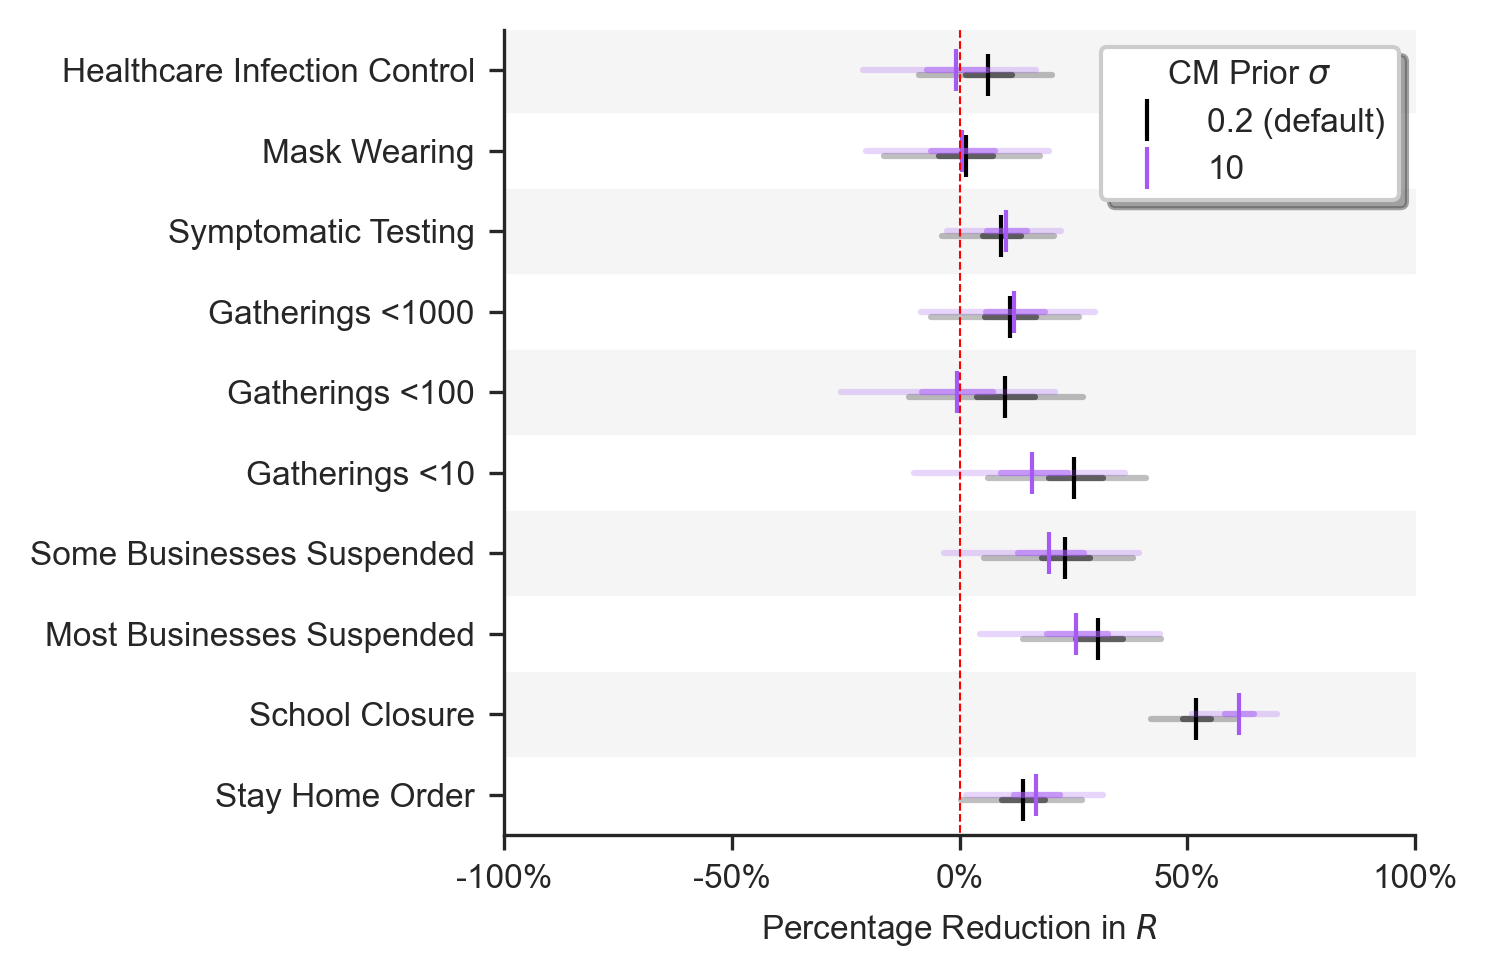

In [59]:
filenames = ['out/default_combined.txt', 'out/cm_prior_combined_wide.txt']
colors = sns.xkcd_palette(['black','lighter purple'])

spl.plot_cm_effect_sensitivity(filenames, cm_labels, legend_labels,
                               legend_title=legend_title,
                               colors = colors)
plt.savefig('out/cm_prior_combined_sensitivity.pdf')

##### plot deaths

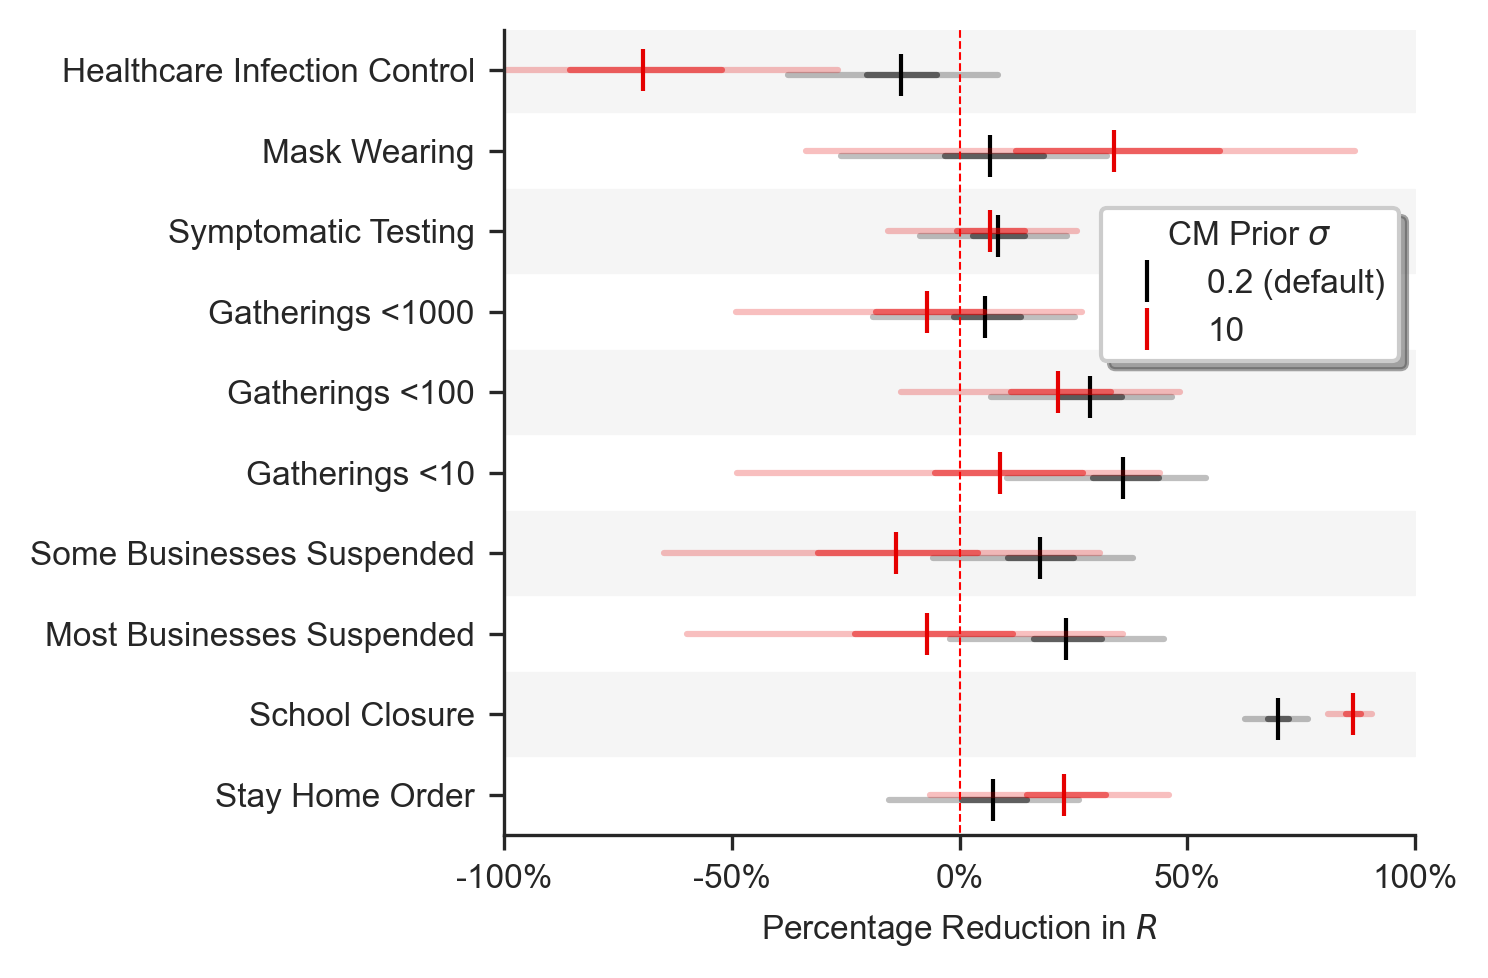

In [83]:
filenames = ['out/death_default.txt', 'out/cm_prior_death_wide.txt']
colors = sns.xkcd_palette(['black','red'])

spl.plot_cm_effect_sensitivity(filenames, cm_labels, legend_labels,
                               legend_title=legend_title,
                               colors=colors,
                               bbox_to_anchor=(1.,0.8))
plt.savefig('out/cm_prior_deaths_sensitivity.pdf')

##### plot active

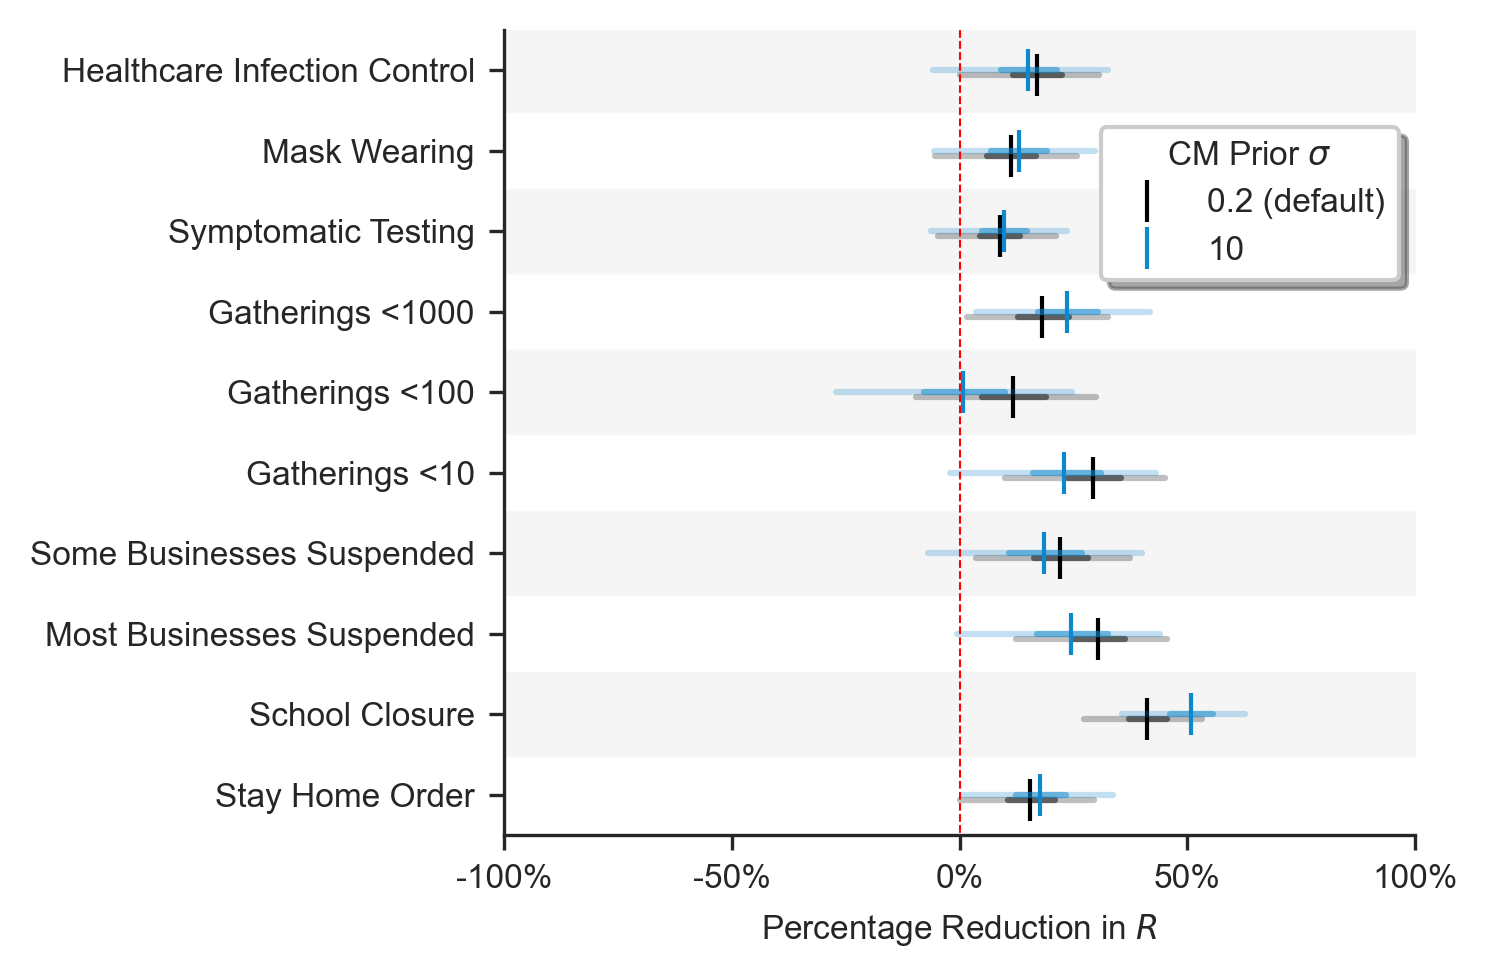

In [85]:
filenames = ['out/active_default.txt', 'out/cm_prior_active_wide.txt']
colors = sns.xkcd_palette(['black','water blue'])

spl.plot_cm_effect_sensitivity(filenames, cm_labels, legend_labels,
                               legend_title=legend_title,
                               colors = colors,
                               bbox_to_anchor=(1.,0.9))
plt.savefig('out/cm_prior_active_sensitivity.pdf')